In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [47]:
data = pd.read_csv('../dataset/loan_approval_dataset.csv')
orignal_data = data.copy()
data.head()

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### About Dataset
This dataset provides insights into loan applicants' characteristics and their risk assessment. It comprises information on various attributes of loan applicants, including demographic details, financial status, employment history, and ownership status. The dataset includes both numerical and categorical features, making it suitable for diverse analytical approaches.


Key Features:

    1). Id: Unique identifier for each loan applicant.
    2). Income: The income level of the applicant.
    3). Age: Age of the applicant.
    4). Experience: Years of professional experience.
    5). Married/Single: Marital status of the applicant.
    6). House_Ownership: Indicates whether the applicant owns or rents a house.
    7). Car_Ownership: Indicates whether the applicant owns a car.
    8). Profession: Occupation or profession of the applicant.
    9). CITY: City of residence of the applicant.
    10).STATE: State of residence of the applicant.
    11).CURRENT_JOB_YRS: Duration of employment in the current job.
    12).CURRENT_HOUSE_YRS: Duration of residence in the current house.
    13).Risk_Flag: Binary indicator of loan risk, where 1 represents a flagged risky applicant and 0 represents a non-risky         applicant.


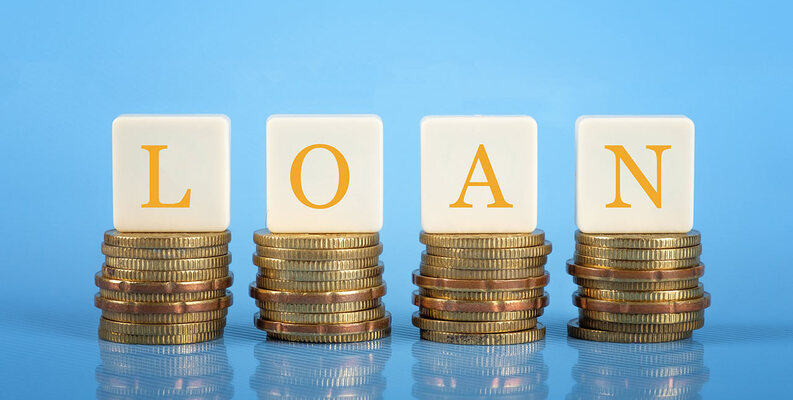

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         252000 non-null  int64 
 1   Id                 252000 non-null  int64 
 2   Income             252000 non-null  int64 
 3   Age                252000 non-null  int64 
 4   Experience         252000 non-null  int64 
 5   Married/Single     252000 non-null  object
 6   House_Ownership    252000 non-null  object
 7   Car_Ownership      252000 non-null  object
 8   Profession         252000 non-null  object
 9   CITY               252000 non-null  object
 10  STATE              252000 non-null  object
 11  CURRENT_JOB_YRS    252000 non-null  int64 
 12  CURRENT_HOUSE_YRS  252000 non-null  int64 
 13  Risk_Flag          252000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 26.9+ MB


In [49]:
data.describe()

,Unnamed: 0,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,125999.500000,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,0.000000,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,62999.750000,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,125999.500000,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,188999.250000,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,251999.000000,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [50]:
data.isnull().sum()

Unnamed: 0           0
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [51]:
data['Married/Single']=data['Married/Single'].map({"single":0, "married":1})

In [52]:
data['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

In [53]:
rent_status = pd.get_dummies(data['House_Ownership'], drop_first=True, dtype=int)
data.drop(['House_Ownership'], axis=1, inplace=True)


In [54]:
data = pd.concat([data, rent_status], axis=1)

In [55]:
data['Car_Ownership'] = data['Car_Ownership'].map({'yes':1, 'no':0})

In [56]:
lb = LabelEncoder()
data['Profession'] = lb.fit_transform(data['Profession'])

In [57]:
data['CITY'] = lb.fit_transform(data['CITY'])

In [58]:
data['STATE'] = lb.fit_transform(data['STATE'])

In [59]:
data = data.iloc[:,1:]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   Married/Single     252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int32
 7   CITY               252000 non-null  int32
 8   STATE              252000 non-null  int32
 9   CURRENT_JOB_YRS    252000 non-null  int64
 10  CURRENT_HOUSE_YRS  252000 non-null  int64
 11  Risk_Flag          252000 non-null  int64
 12  owned              252000 non-null  int32
 13  rented             252000 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 22.1 MB


In [61]:
data.drop(['Id'], axis=1, inplace=True)

In [62]:
data['Income'].describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

In [63]:
data[data['Risk_Flag']==1]['Income'].mean(),data[data['Risk_Flag']==0]['Income'].mean() 

(4973358.837817783, 5000448.720950752)

In [64]:
job_years = data['CURRENT_JOB_YRS'].unique()
len(job_years)

15

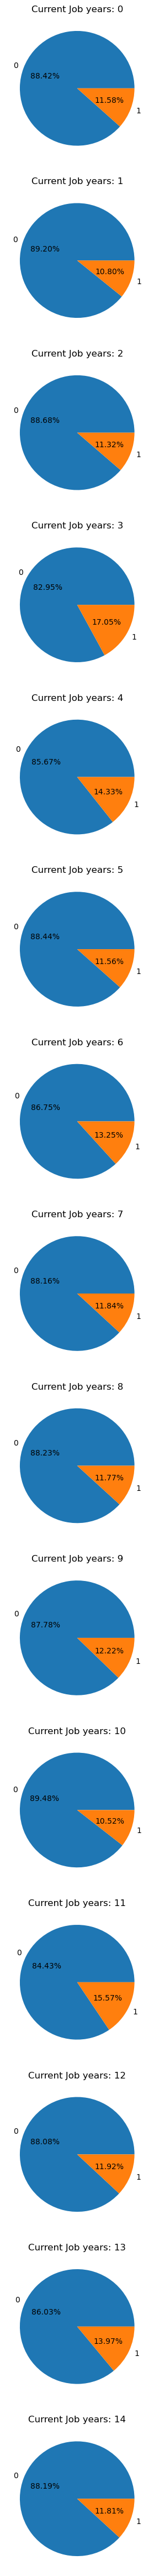

In [65]:
fig, ax = plt.subplots(len(job_years), figsize=(5,60))
i = 0
k=0
h=0
while i!=len(job_years):
    if k!=2:
        value_count = data[data['CURRENT_JOB_YRS']==job_years[i]]['Risk_Flag'].value_counts()
        ax[i].pie(value_count, labels=value_count.keys(),autopct='%1.2f%%')
        ax[i].set_title(f"Current Job years: {i}")
        k+=1
        i+=1
    else:
        h+=1
        k=0

In [66]:
data.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'owned', 'rented'],
      dtype='object')

In [67]:
job_catogories = data['Profession'].unique()

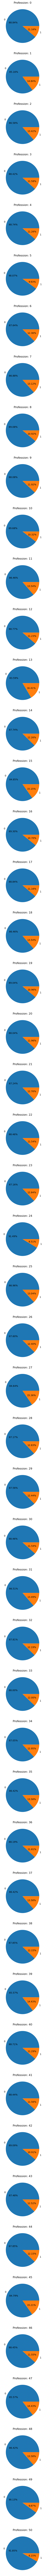

In [68]:
fig, ax = plt.subplots(len(job_catogories), figsize=(5,200))
i = 0
while i!=len(job_catogories):
    if k!=2:
        value_count = data[data['Profession']==job_catogories[i]]['Risk_Flag'].value_counts()
        ax[i].pie(value_count, labels=value_count.keys(),autopct='%1.2f%%')
        ax[i].set_title(f"Profession: {i}")
        k+=1
        i+=1
    else:
        h+=1
        k=0

<Axes: >

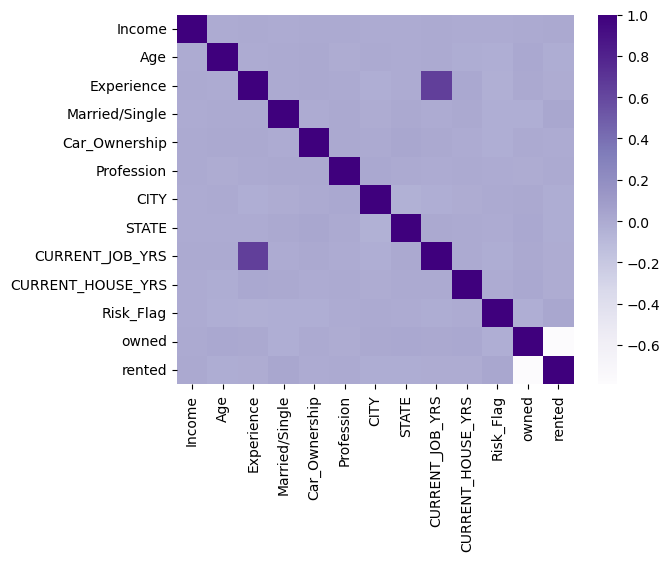

In [69]:
corr = data.corr()
sns.heatmap(corr, cmap="Purples")

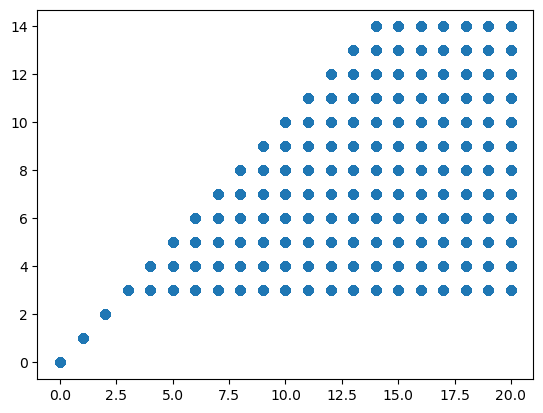

In [70]:
plt.scatter(data['Experience'], data['CURRENT_JOB_YRS'])

In [71]:
corr['Risk_Flag']

Income              -0.003091
Age                 -0.021809
Experience          -0.034523
Married/Single      -0.021092
Car_Ownership       -0.024036
Profession          -0.004900
CITY                 0.004575
STATE               -0.003401
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Risk_Flag            1.000000
owned               -0.023499
rented               0.026647
Name: Risk_Flag, dtype: float64

### modeling

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [73]:
y = data['Risk_Flag']
X = data.drop(['Risk_Flag'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
model1 = LogisticRegression()

In [77]:
model1.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred1 = model1.predict(X_test)

In [79]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
accuracy_score(y_pred1, y_test)

0.8778138528138528

In [81]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(12,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [82]:
model2.fit(X_train ,y_train, epochs=10)

Epoch 1/10


5277/5277 [==============================] - 6s 912us/step - loss: 0.3970 - accuracy: 0.8741
Epoch 2/10
5277/5277 [==============================] - 5s 896us/step - loss: 0.3677 - accuracy: 0.8765
Epoch 3/10
5277/5277 [==============================] - 5s 911us/step - loss: 0.3621 - accuracy: 0.8766
Epoch 4/10
5277/5277 [==============================] - 5s 903us/step - loss: 0.3573 - accuracy: 0.8763
Epoch 5/10
5277/5277 [==============================] - 5s 899us/step - loss: 0.3467 - accuracy: 0.8768
Epoch 6/10
5277/5277 [==============================] - 5s 897us/step - loss: 0.3417 - accuracy: 0.8779
Epoch 7/10
5277/5277 [==============================] - 5s 904us/step - loss: 0.3333 - accuracy: 0.8782
Epoch 8/10
5277/5277 [==============================] - 5s 898us/step - loss: 0.3299 - accuracy: 0.8788
Epoch 9/10
5277/5277 [==============================] - 5s 902us/step - loss: 0.3257 - accuracy: 0.8793
Epoch 10/10
5277/5277 [==============================] - 5s 89

In [83]:
y_pred2 = model2.predict(X_test)

2599/2599 [==============================] - 2s 678us/step


In [84]:
y_pred2 = np.round(y_pred2)

In [85]:
accuracy_score(y_pred2, y_test)

0.8790404040404041